In [2]:
import os
import glob
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns

base_dir = '/Users/lukechang/Dropbox/MIND_OpenBeacon/'

In [3]:
data = pd.read_csv(os.path.join(base_dir, 'Data','mind_openbeacon_long.csv'), index_col=0)


/Users/lukechang/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
data.head()

,tag_me,tag_them,time_local_s,time_remote_s,rssi,angle,group,rssi_recoded
0,0x4971A32A,0x0B3054C1,52,4,-83,90,1,6
1,0x4971A32A,0x0B3054C1,54,6,-87,90,1,2
2,0x4971A32A,0x0B3054C1,74,26,-80,90,1,9
3,0x4971A32A,0x0B3054C1,120,72,-81,90,1,8
4,0x4971A32A,0x0B3054C1,128,80,-82,90,1,7


In [9]:
tag_me_unique = data['tag_me'].unique()
tag_them_unique = data['tag_them'].unique()
print(f'n tags me: {len(tag_me_unique)} n tags them: {len(tag_them_unique)}')


n tags me: 28 n tags them: 36


In [22]:
from nltools.data import Adjacency
import networkx as nx

names = ['Luke Chang','Thalia Wheatley','Meghan Meyer','Mark Thornton','Jeremy Manning','Caroline Robertson','Jim Haxby', 'Yarik Halchenko','Matt van der Meer','Jeff Taube']
A = pd.DataFrame(np.eye(len(names)), columns=names, index=names)

/Users/lukechang/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/lukechang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


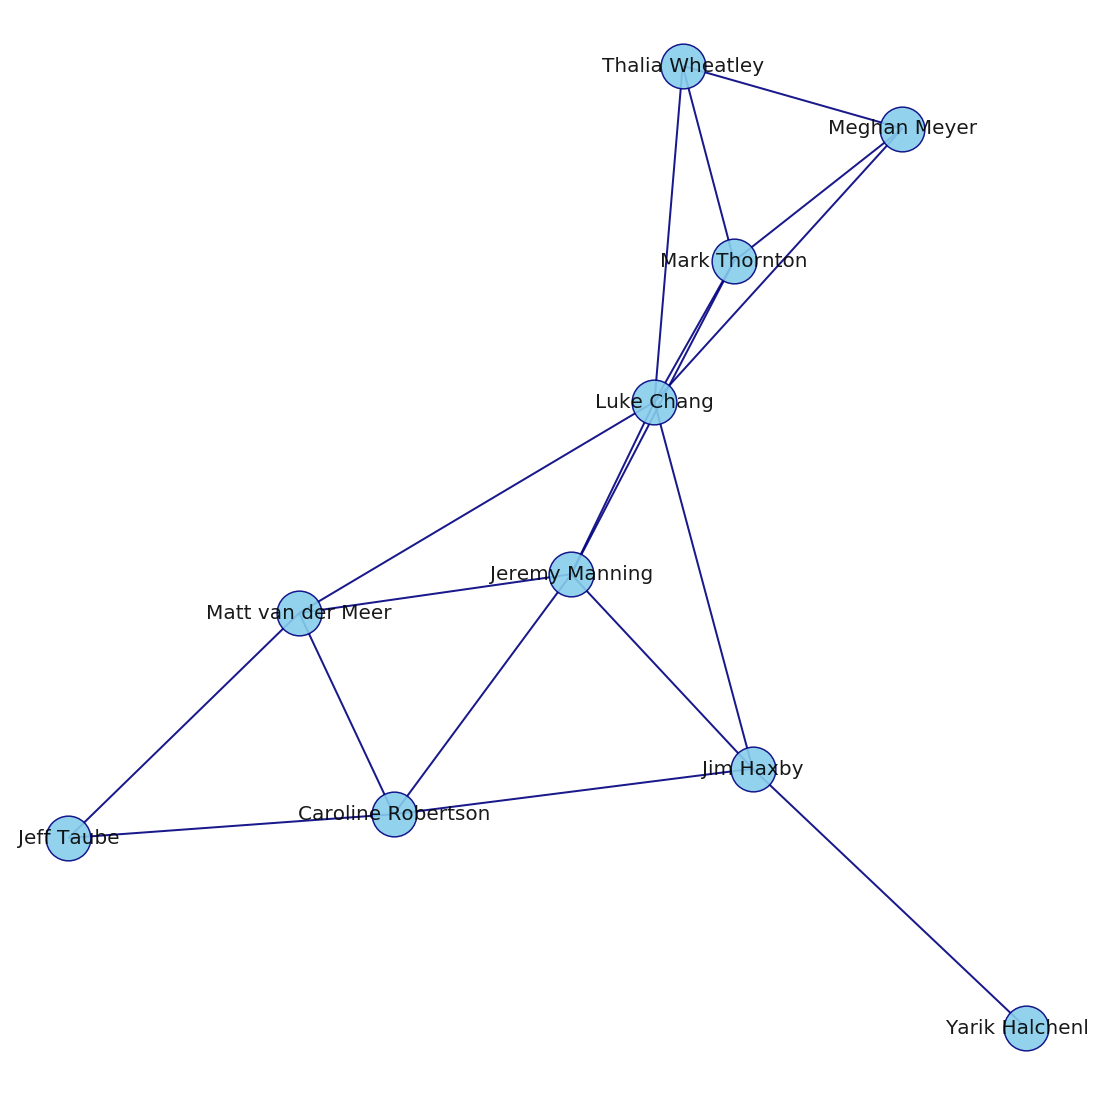

In [87]:
d = {'Luke Chang':['Thalia Wheatley','Mark Thornton','Meghan Meyer','Jim Haxby','Jeremy Manning','Matt van der Meer'], 
     'Thalia Wheatley':['Luke Chang','Meghan Meyer','Mark Thornton',],
     'Meghan Meyer':['Thalia Wheatley','Meghan Meyer','Mark Thornton'],
     'Mark Thornton':['Luke Chang','Thalia Wheatley','Meghan Meyer','Jeremy Manning'],
     'Jeremy Manning':['Luke Chang','Jim Haxby','Caroline Robertson', 'Matt van der Meer'],
     'Jim Haxby':['Luke Chang','Jeremy Manning','Caroline Robertson', 'Yarik Halchenko'],
     'Caroline Robertson':['Jeff Taube','Jeremy Manning','Jim Haxby', 'Matt van der Meer'],
     'Jeff Taube':['Caroline Robertson','Matt van der Meer'],
     'Yarik Halchenko':['Jim Haxby']}
G = nx.Graph(d)
df = nx.to_pandas_adjacency(G)


with sns.plotting_context(context='talk', font_scale=5):
    plt.figure(figsize=(15,15))
    np.random.seed(9) # Just to keep things same
    pos = pos = nx.fruchterman_reingold_layout(G) # Another way of specifiying a layout for nodes.
    pos = pos = nx.spring_layout(G) # Another way of specifiying a layout for nodes.
    nx.draw(G,with_labels=True,node_size=2000,font_size=20,alpha=.9,width=2,node_color='skyblue',edge_color='navy',edgecolors='navy')
    plt.tight_layout()
    plt.savefig('/Users/lukechang/Downloads/MIND_2019_Dartmouth_Graph.pdf', transparent=False, pad_inches=.5)

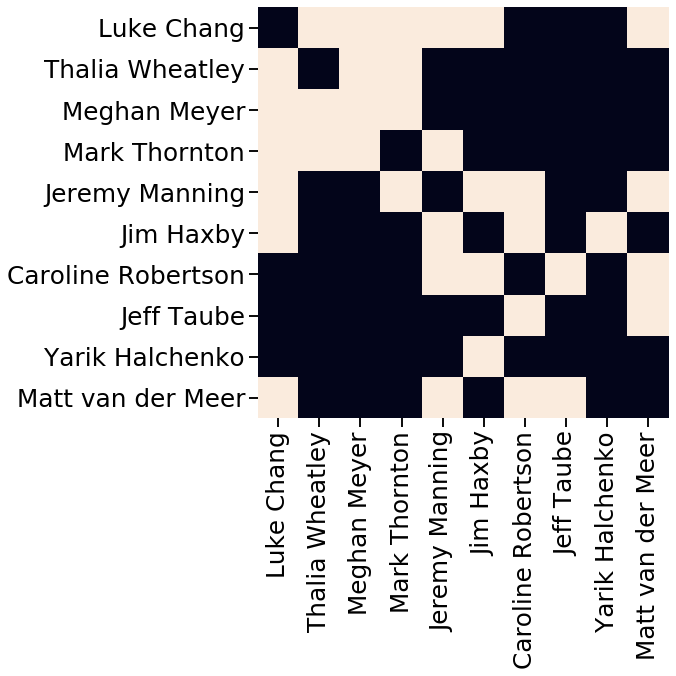

In [43]:
with sns.plotting_context(context='talk', font_scale=1.5):
    plt.figure(figsize=(10,10))
    sns.heatmap(df, cbar=False, square=True, )
    plt.tight_layout()
    plt.savefig('/Users/lukechang/Downloads/MIND_2019_Dartmouth_Adjacency.pdf')

In [37]:
plt.figure?